# practice_ds_I_03-01.ipynb
# データサイエンスI (第3回)演習ファイル

データサイエンスI 第3回 演習用 jupyter note book

目的

オープンデータを取り込んで散布図を作ってみる。

Google colab へのデータの取り込み方を確認する。

この演習では、オープンデータを使ってデータの散布図を作成します。

使用するオープンデータは、平成28年度「英語教育実施状況調査」です。
オープンデータはPDFで公開されていますが、R言語から利用できるようにするため、あらかじめcsvファイルに変換してあるものとします。






# 1 使用するオープンデータ

平成28年度「英語教育実施状況調査」について<br/>

http://www.mext.go.jp/a_menu/kokusai/gaikokugo/1384230.htm <br/>

都道府県別調査結果


#2 Google Colab へのデータのアップロード

このデータを以下の手順でgoogle colabにアップロードします。

まずこのアイコンをクリックします。

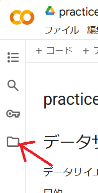

そしてこちらのアイコンをクリックします。

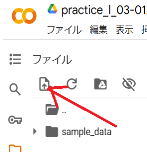

するとアップロードするファイルを選択できます。


In [ ]:
# フォルダにファイルがあることを確認する
print(getwd())
print(list.files())


[1] "/content"
[1] "sample_data"


結果が、以下のようになれば成功です。

~~~
[1] "/content"
[1] "sample_data"  "table001.csv" "table003.csv"
~~~
こうならない場合は、ファイルのアップロードができていないので、ファイルのアップロードの方法を別途確認してアップロードしてからこのノートブックを実行してください。

次にこれらのファイルからデータを読み込みます。

以下では、csv ファイルを読み込むためのライブラリを準備します。readrというパッケージを使いますが、google colab ではreadrは最初からインストールされているので、ここでインストールする必要はないので、コメントアウトされています(#をつけてコメントとして、実行されないようになっています)

Google Colab ではない、たとえば自分のパソコン上のR言語環境で動作させる場合、この2行目のコメントを解除(#を削除)して、readrをインストールしてから続行してください。

In [ ]:
# ヘッダ付きのcsvファイルをライブラリを使って読み込む(google colab では不要?)
# install.packages("readr")

通常は以下のコマンドから初めて大丈夫です。もし以下のコマンドがエラーになったばあいには上のセルの2行目の#を削除して、コメントを解除し、実行してから再度下のセルを実行してください。

In [ ]:
library(readr)

次に、table001.csvを読み込みます。

In [ ]:
# table001.csv を読み込む
table001 <- read_csv("table001.csv")


なにやら表示されますがこれはエラーではありません。

~~~
chr (5): Column1, Column4, Column6, Column8, Column10
dbl (2): Column5, Column7
num (3): Column2, Column3, Column9
~~~
これはデータフレームの各カラムがどういうデータ型であったか、という分析結果を示しています。


In [ ]:
head(table001)

In [ ]:
# table003.csv を読み込みます
table003 <- read_csv("table003.csv")

In [ ]:
head(table003)

ここまでで、table001, table003 がきちんと読み込めたことをまず確認しましょう。このようにデータ解析では、必要なデータを成形して計算に使える形にする作業がけっこう手間どります。この部分には人間が判断する要素が多く、なかなか完全に機械が自動的に行えない部分でもあります。

確認ができデータが整っているようなら次のステップに進もみましょう。

table001の10列目は 99% というような%で終わる文字列になっているので、これを数値に変換します。

In [ ]:
table004 <- table001
table004[,10] <- as.numeric(gsub("%","",table001[, 10, drop = TRUE]))/100
head(table004)


In [ ]:
table_4_3 <- merge(table004, table003, by = "Column1")
head(table_4_3)


では、教員の英語の能力と、生徒の英語の能力を x, y としてグラフ化してみましょう。

注意

グラフタイトル(main)、xlab, ylab では半角英字しかつかえません。日本語を使うと文字化けしますので使わないように注意してください。

In [ ]:
plot(table_4_3[,10], table_4_3[,19], main="Scatter plot of English proficiency between teachers and students", xlab="Teachers", ylab="Students", pch=19)


次に回帰直線を書いてみましょう。

回帰直線を描くには線形回帰をして、係数と切片をもとめ、それを使って回帰直線を描画します。

まず線形回帰と、係数と切片を求めます。

In [ ]:
lm_model <- lm(Column10.y ~ Column10.x, data = table_4_3)

# 回帰モデルの要約を表示
summary(lm_model)

# 回帰直線の傾き（係数）と切片を抽出
slope <- coef(lm_model)["Column10.x"]
intercept <- coef(lm_model)["(Intercept)"]
cat('slope=',slope, '  intercept',intercept, '\n')


そして、得られた係数と切片を用いて、以下のようにして散布図と回帰直線を重ねて描画することができます。


In [ ]:
plot(table_4_3[,10], table_4_3[,19], main="Scatter plot of English proficiency between teachers and students", xlab="Teachers", ylab="Students", pch=19)

abline(a=intercept, b=slope, col="red")